# **Adaboost Demo**

In [1]:
import pandas as pd 
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

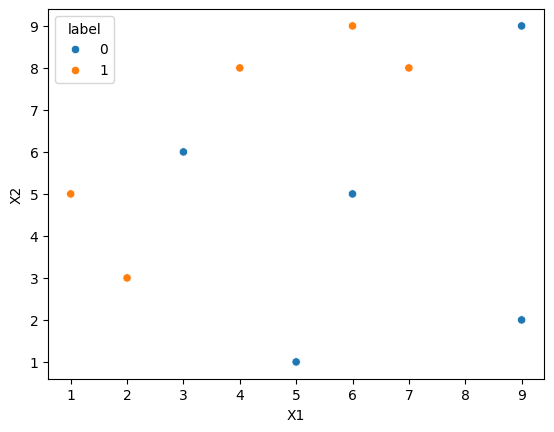

In [5]:
import seaborn as sns

sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [6]:
df['weights'] = 1/df.shape[0]

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [10]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [12]:
# step 2 - train 1st model 

dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

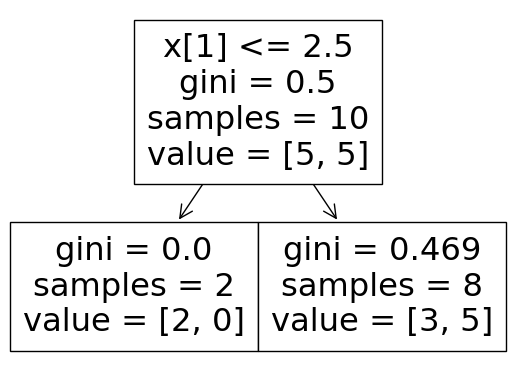

In [13]:
from sklearn.tree import plot_tree

plot_tree(dt1)

<Axes: >

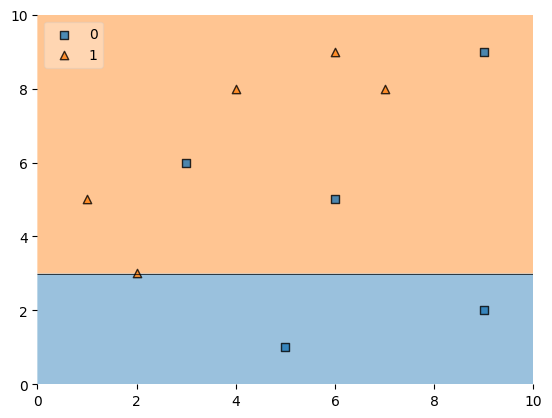

In [14]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [21]:
df['y_pred'] = dt1.predict(X)

In [23]:
df

,X1,X2,label,weights,y_ped,y_pred
0,1,5,1,0.1,1,1
1,2,3,1,0.1,1,1
2,3,6,0,0.1,1,1
3,4,8,1,0.1,1,1
4,5,1,0,0.1,0,0
5,6,9,1,0.1,1,1
6,6,5,0,0.1,1,1
7,7,8,1,0.1,1,1
8,9,9,0,0.1,1,1
9,9,2,0,0.1,0,0


In [24]:
def calculate_model_weight(error):
    return 0.5 * np.log((1-error)/(error))

In [25]:
# step 3 - calculate model weight

alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [26]:
# step 4 - update weights

def update_row_weights(row, alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [27]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [28]:
df

,X1,X2,label,weights,y_ped,y_pred,updated_weights
0,1,5,1,0.1,1,1,0.065508
1,2,3,1,0.1,1,1,0.065508
2,3,6,0,0.1,1,1,0.152653
3,4,8,1,0.1,1,1,0.065508
4,5,1,0,0.1,0,0,0.065508
5,6,9,1,0.1,1,1,0.065508
6,6,5,0,0.1,1,1,0.152653
7,7,8,1,0.1,1,1,0.065508
8,9,9,0,0.1,1,1,0.152653
9,9,2,0,0.1,0,0,0.065508


In [29]:
df['updated_weights'].sum()

0.9165153319682015

In [30]:
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

In [31]:
df

,X1,X2,label,weights,y_ped,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,1,0.065508,0.071475
1,2,3,1,0.1,1,1,0.065508,0.071475
2,3,6,0,0.1,1,1,0.152653,0.166559
3,4,8,1,0.1,1,1,0.065508,0.071475
4,5,1,0,0.1,0,0,0.065508,0.071475
5,6,9,1,0.1,1,1,0.065508,0.071475
6,6,5,0,0.1,1,1,0.152653,0.166559
7,7,8,1,0.1,1,1,0.065508,0.071475
8,9,9,0,0.1,1,1,0.152653,0.166559
9,9,2,0,0.1,0,0,0.065508,0.071475


In [32]:
df['normalized_weights'].sum()

1.0

In [33]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [34]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [35]:
df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [36]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [37]:
index_values = create_new_dataset(df)
index_values

[3, 1, 6, 5, 6, 5, 4, 8, 5, 1]

In [38]:
second_df = df.iloc[index_values, [0, 1, 2, 3]]

In [39]:
second_df

,X1,X2,label,weights
3,4,8,1,0.1
1,2,3,1,0.1
6,6,5,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
5,6,9,1,0.1
4,5,1,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
1,2,3,1,0.1


In [40]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [41]:
X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:,2].values

In [42]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 4.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]')]

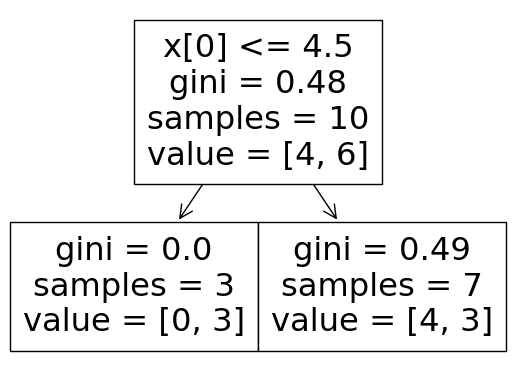

In [43]:
plot_tree(dt2)

<Axes: >

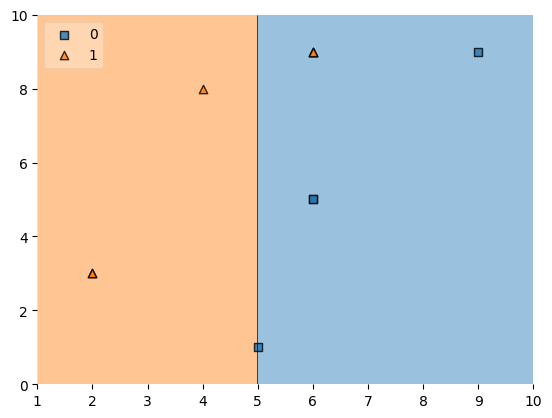

In [44]:
plot_decision_regions(X,y, clf=dt2, legend=2)

In [45]:
second_df['y_pred'] = dt2.predict(X)

In [46]:
second_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
1,2,3,1,0.1,1
6,6,5,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
5,6,9,1,0.1,0
4,5,1,0,0.1,0
8,9,9,0,0.1,0
5,6,9,1,0.1,0
1,2,3,1,0.1,1


In [47]:
alpha2 = calculate_model_weight(0.1)

In [48]:
alpha2

1.0986122886681098

In [49]:
# step 4 - update weights

def update_row_weights(row, alpha=1.09):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [50]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [51]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
3,4,8,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
6,6,5,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
4,5,1,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
1,2,3,1,0.1,1,0.033622


In [55]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [56]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,normalized_weights
3,4,8,1,0.1,1,0.033622,0.029816,0.029816
1,2,3,1,0.1,1,0.033622,0.029816,0.029816
6,6,5,0,0.1,0,0.033622,0.029816,0.029816
5,6,9,1,0.1,0,0.297427,0.263762,0.263762
6,6,5,0,0.1,0,0.033622,0.029816,0.029816
5,6,9,1,0.1,0,0.297427,0.263762,0.263762
4,5,1,0,0.1,0,0.033622,0.029816,0.029816
8,9,9,0,0.1,0,0.033622,0.029816,0.029816
5,6,9,1,0.1,0,0.297427,0.263762,0.263762
1,2,3,1,0.1,1,0.033622,0.029816,0.029816


In [57]:
second_df['normalized_weights'].sum()

1.0

In [58]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [59]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
3,4,8,1,0.1,1,0.029816,0.000000,0.029816
1,2,3,1,0.1,1,0.029816,0.029816,0.059632
6,6,5,0,0.1,0,0.029816,0.059632,0.089448
5,6,9,1,0.1,0,0.263762,0.089448,0.353211
6,6,5,0,0.1,0,0.029816,0.353211,0.383027
5,6,9,1,0.1,0,0.263762,0.383027,0.646789
4,5,1,0,0.1,0,0.029816,0.646789,0.676605
8,9,9,0,0.1,0,0.029816,0.676605,0.706421
5,6,9,1,0.1,0,0.263762,0.706421,0.970184
1,2,3,1,0.1,1,0.029816,0.970184,1.000000


In [60]:
index_values = create_new_dataset(second_df)

In [61]:
third_df = second_df.iloc[index_values, [0, 1, 2, 3]]

In [62]:
third_df

,X1,X2,label,weights
1,2,3,1,0.1
5,6,9,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [63]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

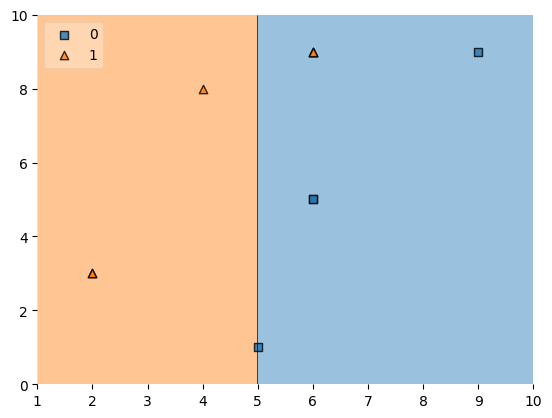

In [64]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [66]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
5,6,9,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,0
5,6,9,1,0.1,1


In [67]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [68]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


## **Prediction**

In [69]:
query = np.array([1, 5]).reshape(1, 2)
dt1.predict(query)

array([1], dtype=int64)

In [70]:
dt2.predict(query)

array([1], dtype=int64)

In [71]:
dt3.predict(query)

array([1], dtype=int64)

In [74]:
result = alpha1*(1) + alpha2*(1) + alpha3*(1)

In [75]:
np.sign(result)

1.0